Chapter 17

# 不同核函数
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码展示了 `statsmodels` 库中的多种核函数（kernels）及其在核密度估计 (KDE) 中的效果。核密度估计用于平滑样本数据，从而生成数据的概率密度函数 (PDF) 的估计。代码包含两部分：首先可视化不同核函数的形状，其次将这些核函数应用于给定样本数据以展示不同核函数对密度估计的影响。

1. **核函数的展示**：
   - 代码使用 `statsmodels` 的 `kernel_switch` 来访问各种核函数的类型。每种核函数 $K(x)$ 代表一种光滑方法，用于将点的密度分布在核函数的定义域上。
   - 在 $[-3, 3]$ 范围内取样计算核函数值 $K(x)$ 并生成曲线，从而展示核函数的形状。
   - 核函数 $K(x)$ 满足：
   $$
   \int_{-\infty}^{\infty} K(x) \, dx = 1
   $$
   - 绘制了 8 种不同核的图形，每个子图展示其特征形状及中心位置 (0) 的标记。

2. **不同核函数在 KDE 中的应用**：
   - 给定一组样本数据 `data = [-3, -2, 0, 2, 2.5, 3, 4]`，代码对这些数据进行核密度估计。
   - 逐一采用不同的核函数来估计数据的概率密度函数。核密度估计公式为：
   $$
   \hat{f}(x) = \frac{1}{n \cdot h} \sum_{i=1}^{n} K\left(\frac{x - x_i}{h}\right)
   $$
   其中，$h$ 为平滑带宽 (bandwidth)。
   - 使用带宽 $bw=1.5$ 对数据进行平滑，每个子图展示不同核函数应用于同一组数据时生成的核密度估计曲线，支持和密度上生成曲线的填充区域。
   - 每个子图还显示了红色的 "x" 标记，表示样本数据的位置，从而直观展示数据分布与核密度估计的效果。

代码通过不同核函数的展示及其在密度估计上的应用，对比了核选择对核密度估计结果的影响，从而帮助理解核密度估计在数据平滑中的作用及其依赖的核函数选择。

In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt 
from statsmodels.nonparametric.kde import kernel_switch
from itertools import islice

## 显示可用核函数

In [2]:
list(kernel_switch.keys())  # 列出所有可用的核函数选项

['gau', 'epa', 'uni', 'tri', 'biw', 'triw', 'cos', 'cos2', 'tric']

## 创建图形窗口

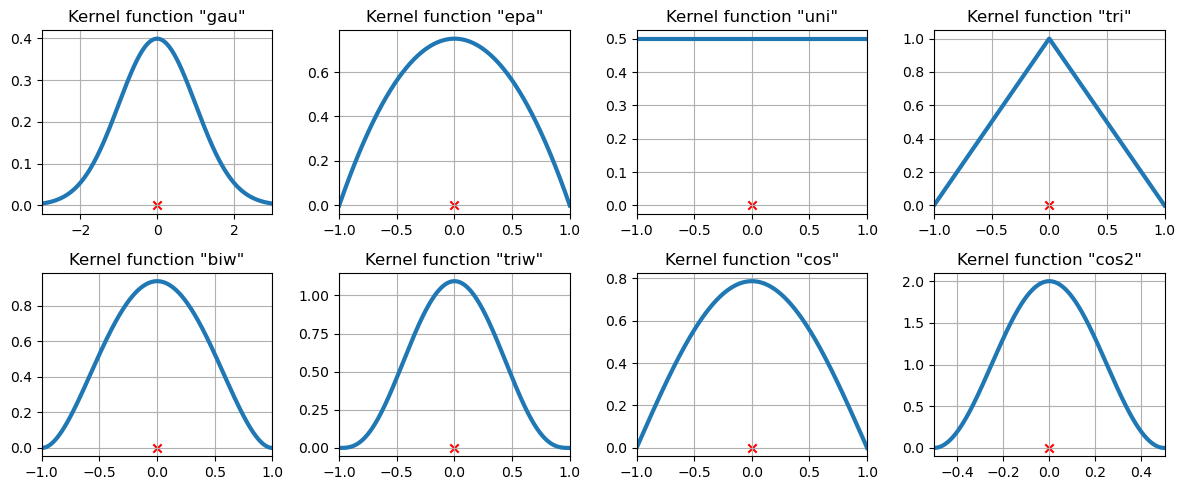

In [3]:
fig = plt.figure(figsize=(12, 5))  # 设置图形大小

# 遍历前8种核函数选项
for i, (ker_name, ker_class) in enumerate(islice(kernel_switch.items(), 8)):
    
    kernel = ker_class()  # 初始化核对象
    
    # 取样域值
    domain = kernel.domain or [-3, 3]  # 若无定义，默认域为[-3, 3]
    x_vals = np.linspace(*domain, num=2**10)  # 在域内生成点
    y_vals = kernel(x_vals)  # 计算核函数值

    # 创建子图，设置标题
    ax = fig.add_subplot(2, 4, i + 1)
    ax.set_title('Kernel function "{}"'.format(ker_name))  # 设置标题
    ax.plot(x_vals, y_vals, lw=3, label='{}'.format(ker_name))  # 绘制核函数曲线
    ax.scatter([0], [0], marker='x', color='red')  # 标注中心点
    plt.grid(True, zorder=-5)  # 显示网格
    ax.set_xlim(domain)  # 设置x轴范围
    
plt.tight_layout()  # 紧凑布局

## KDE估计

In [4]:
data = [-3, -2, 0, 2, 2.5, 3, 4]  # 样本数据
kde = sm.nonparametric.KDEUnivariate(data)  # 创建核密度估计对象

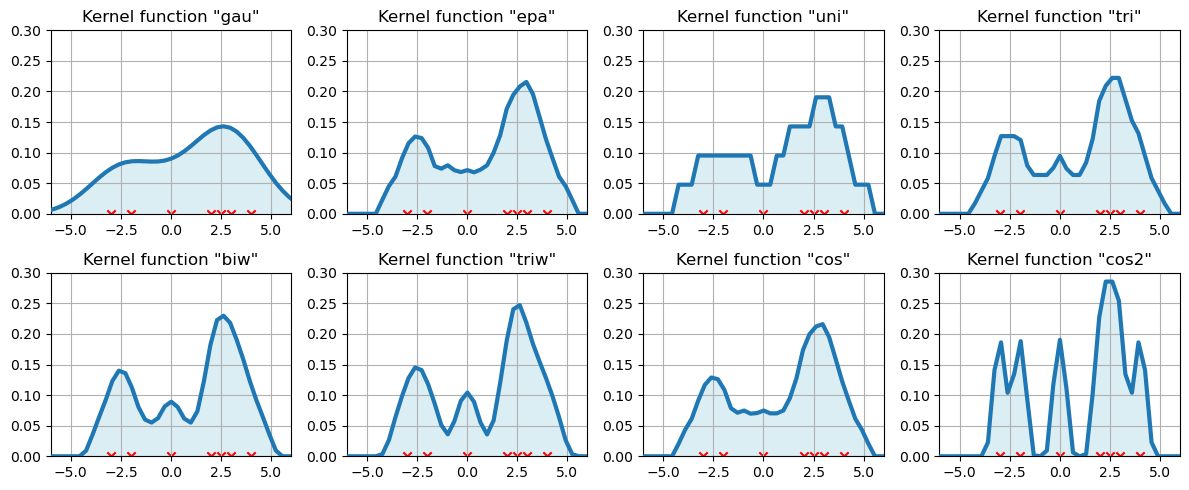

In [5]:
## 创建图形窗口
fig = plt.figure(figsize=(12, 5))  # 设置图形大小

## 遍历前8种核函数选项
for i, kernel in enumerate(islice(kernel_switch.keys(), 8)):
    
    ax = fig.add_subplot(2, 4, i + 1)  # 创建子图
    ax.set_title('Kernel function "{}"'.format(kernel))  # 设置标题
    
    # 拟合模型（估计密度）
    kde.fit(kernel=kernel, fft=False, bw=1.5)  # 指定核和带宽，进行密度估计
    
    ax.fill_between(kde.support, kde.density, facecolor='#DBEEF4')  # 填充密度估计区域
    ax.plot(kde.support, kde.density, lw=3, label='KDE from samples', zorder=10)  # 绘制密度曲线
    ax.scatter(data, np.zeros_like(data), marker='x', color='red')  # 绘制样本点
    plt.grid()  # 显示网格
    ax.set_xlim([-6, 6])  # 设置x轴范围
    ax.set_ylim([0, 0.3])  # 设置y轴范围
    
plt.tight_layout()  # 紧凑布局